In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection 

In [2]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day) 
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df 

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-20,21.823137,22.138794,21.063306,21.442094,289337600
2016-01-21,21.712662,22.068901,21.406024,21.884017,208646000
2016-01-22,22.867056,22.876075,22.179377,22.237997,263202000
2016-01-25,22.420628,22.891857,22.368769,22.889602,207178000
2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000
...,...,...,...,...,...
2026-01-12,260.250000,261.299988,256.799988,259.160004,45263800
2026-01-13,261.049988,261.809998,258.390015,258.720001,45730800


# 2. Data Exploration and Visualization

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(2514, 5)

In [5]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [6]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,115.337092,116.480200,114.082211,115.231473,1.008666e+08
std,73.735346,74.437593,72.968583,73.674275,5.712409e+07
min,20.604078,20.907414,20.405656,20.526533,1.791060e+07
25%,41.800033,42.050737,41.492731,41.815821,6.103548e+07
50%,121.659454,122.862682,119.936564,121.459323,8.823305e+07
75%,172.107113,173.945704,170.829510,171.944975,1.233020e+08
max,286.190002,288.619995,283.299988,286.200012,5.334788e+08


In [7]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [8]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-20,21.823137,22.138794,21.063306,21.442094,289337600
2016-01-21,21.712662,22.068901,21.406024,21.884017,208646000
2016-01-22,22.867056,22.876075,22.179377,22.237997,263202000
2016-01-25,22.420628,22.891857,22.368769,22.889602,207178000
2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000


In [9]:
df = df.reset_index()

In [10]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2016-01-20,21.823137,22.138794,21.063306,21.442094,289337600
1,2016-01-21,21.712662,22.068901,21.406024,21.884017,208646000
2,2016-01-22,22.867056,22.876075,22.179377,22.237997,263202000
3,2016-01-25,22.420628,22.891857,22.368769,22.889602,207178000
4,2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000


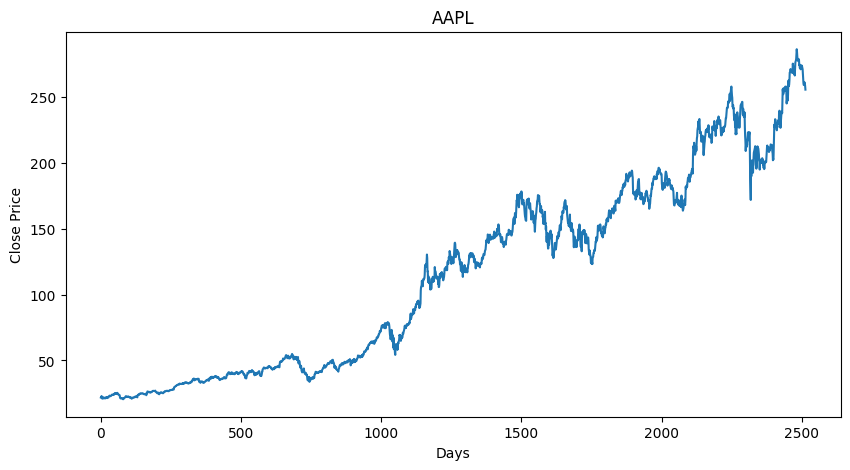

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price');

# 3. Feature Engineering 

In [12]:
# Example:
# If prices are:
# 10, 12, 11, 13, 15

# A 3-period moving average would be:

# (10 + 12 + 11) / 3 = 11

# (12 + 11 + 13) / 3 = 12

# (11 + 13 + 15) / 3 = 13

# Result: 11, 12, 13 → smoother than the original data.

### 100 days moving average

In [13]:
df['MA_100'] = df.Close.rolling(100).mean() # where Close is a column
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2016-01-20,21.823137,22.138794,21.063306,21.442094,289337600,NaN
1,2016-01-21,21.712662,22.068901,21.406024,21.884017,208646000,NaN
2,2016-01-22,22.867056,22.876075,22.179377,22.237997,263202000,NaN
3,2016-01-25,22.420628,22.891857,22.368769,22.889602,207178000,NaN
4,2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000,NaN


In [14]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2016-01-20,21.823137,22.138794,21.063306,21.442094,289337600,NaN
1,2016-01-21,21.712662,22.068901,21.406024,21.884017,208646000,NaN
2,2016-01-22,22.867056,22.876075,22.179377,22.237997,263202000,NaN
3,2016-01-25,22.420628,22.891857,22.368769,22.889602,207178000,NaN
4,2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000,NaN
...,...,...,...,...,...,...,...
98,2016-06-09,22.727432,22.804976,22.456025,22.465148,106405600,NaN
99,2016-06-10,22.540413,22.659010,22.460588,22.471990,126851600,22.719659
100,2016-06-13,22.200590,22.606561,22.145853,22.508490,152082000,22.723433


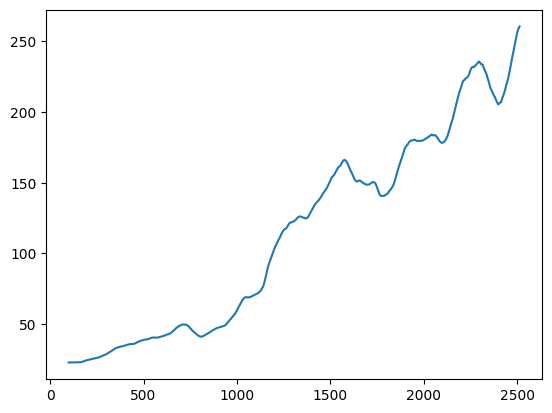

In [15]:
plt.plot(df['MA_100'])

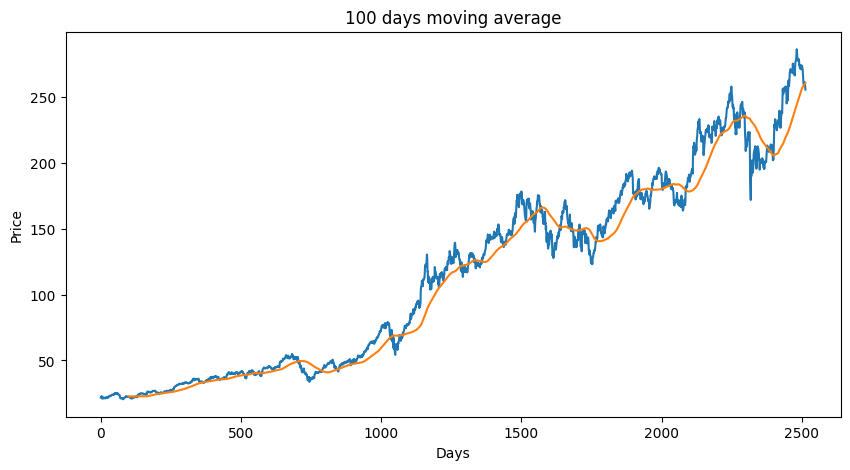

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.plot(df['MA_100'])
plt.title('100 days moving average')
plt.xlabel('Days')
plt.ylabel('Price');

### 200 days moving average

In [17]:
df['MA_200'] = df.Close.rolling(200).mean() # where Close is a column
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2016-01-20,21.823137,22.138794,21.063306,21.442094,289337600,NaN,NaN
1,2016-01-21,21.712662,22.068901,21.406024,21.884017,208646000,NaN,NaN
2,2016-01-22,22.867056,22.876075,22.179377,22.237997,263202000,NaN,NaN
3,2016-01-25,22.420628,22.891857,22.368769,22.889602,207178000,NaN,NaN
4,2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-10-31,26.035645,26.193868,25.957679,26.060869,105677600,24.353809,NaN
199,2016-11-01,25.565557,26.088380,25.345422,26.017295,175303200,24.384060,23.551860
200,2016-11-02,25.588493,25.762768,25.505944,25.544926,113326800,24.417939,23.570686


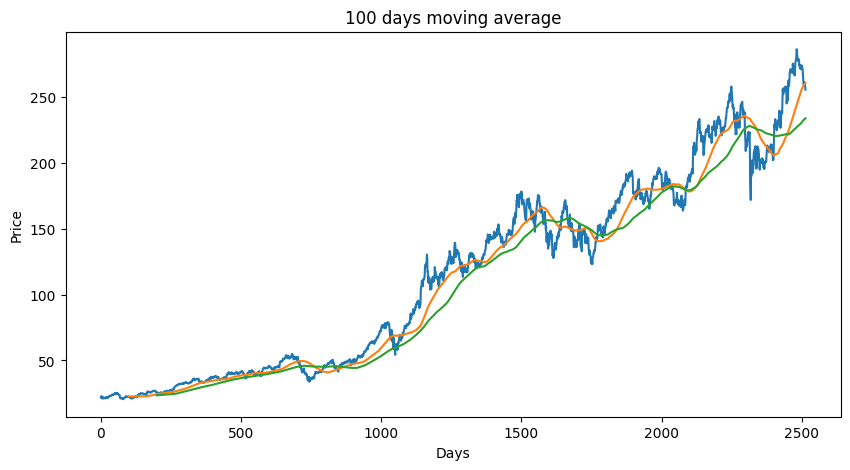

In [18]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.plot(df['MA_100'])
plt.plot(df['MA_200'])
plt.title('100 days moving average')
plt.xlabel('Days')
plt.ylabel('Price');

### Calculating % changed in each trading session

In [19]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,21.823137,NaN
1,21.712662,-0.005062
2,22.867056,0.053167
3,22.420628,-0.019523
4,22.544640,0.005531
...,...,...
2509,260.250000,0.003393
2510,261.049988,0.003074
2511,259.959991,-0.004175


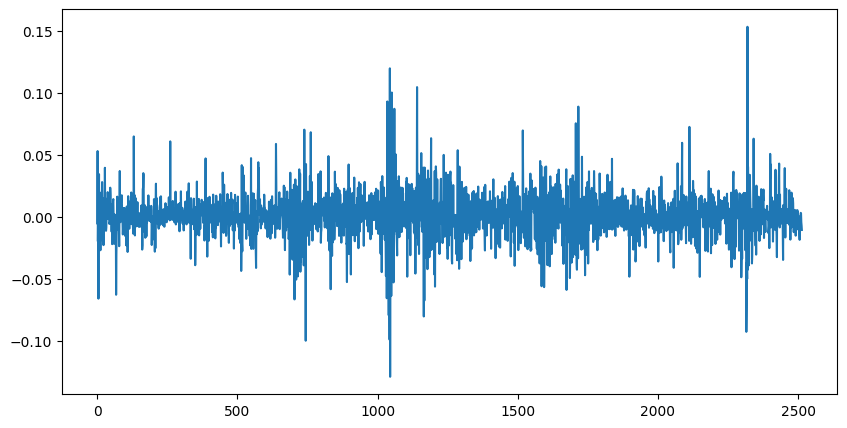

In [20]:
plt.figure(figsize=(10,5))
plt.plot(df['Percentage Changed']);

# 4. Data Preprocessing

In [21]:
df.shape

(2514, 9)

In [22]:
# Splitting Data Into Training and Testing Datasets
split_idx = int(len(df) * 0.7)

data_training = df.iloc[:split_idx][('Close', 'AAPL')].to_frame(name='Close')
data_testing  = df.iloc[split_idx:][('Close', 'AAPL')].to_frame(name='Close')

In [23]:
data_training

,Close
0,21.823137
1,21.712662
2,22.867056
3,22.420628
4,22.544640
...,...
1754,127.693581
1755,128.215683
1756,128.787094
1757,131.506104


In [24]:
data_testing

,Close
1759,132.757172
1760,133.919678
1761,133.200500
1762,133.259613
1763,135.820969
...,...
2509,260.250000
2510,261.049988
2511,259.959991
2512,258.209991


In [25]:
# Scalling the Data (between 0-1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_training)
type(data_training_array)

numpy.ndarray

# 5. Sequence Creation

In [27]:
# Window size = 100

# Input (x_train) = 100 previous days

# Output (y_train) = 101st day (next day)

In [28]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train.ndim

3

# 6. Building the Model

In [30]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [31]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM,Input

In [32]:
model = Sequential()
model.add(Input(shape=(100, 1))) # 100 previous days data and 1 feature
model.add(LSTM(units=128, activation='tanh', return_sequences=True)) # 128 neurons, tanh (hyperbolic tangent) for handling - and + values, return result to the next LSTM layer
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1)) # final prediction

# 7. Model Training 

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50) # learn from date 50x

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 0.0167
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 7.0486e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 6.7361e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 6.6512e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 6.7455e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 6.2248e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 6.0240e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 5.6699e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 5.8106e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 5.6822e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 5.0708e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 4.9490e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.3973e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 4.6754e-04
Epoch 15/50
52/52 

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [35]:
# save the trained model
model.save('stock_prediction_model.keras') # can use this pre-trained model

# 8. Preparing Test Data

In [36]:
data_testing

,Close
1759,132.757172
1760,133.919678
1761,133.200500
1762,133.259613
1763,135.820969
...,...
2509,260.250000
2510,261.049988
2511,259.959991
2512,258.209991


In [37]:
past_100 = data_training.tail(100)
past_100

,Close
1659,164.806198
1660,164.471802
1661,164.766830
1662,167.225601
1663,160.921341
...,...
1754,127.693581
1755,128.215683
1756,128.787094
1757,131.506104


In [38]:
final_df = pd.concat([past_100, data_testing], ignore_index=True)
final_df

,Close
0,164.806198
1,164.471802
2,164.766830
3,167.225601
4,160.921341
...,...
850,260.250000
851,261.049988
852,259.959991
853,258.209991


In [39]:
input_data = scaler.fit_transform(final_df)

In [40]:
input_data

array([[2.55442227e-01],
       [2.53391068e-01],
       [2.55200749e-01],
       [2.70282636e-01],
       [2.31612848e-01],
       [2.18099351e-01],
       [2.03198572e-01],
       [1.93003149e-01],
       [1.97467402e-01],
       [1.84497042e-01],
       [1.76775084e-01],
       [1.85401929e-01],
       [1.76352778e-01],
       [1.93908223e-01],
       [2.30466483e-01],
       [1.72612398e-01],
       [1.81480628e-01],
       [1.63744355e-01],
       [1.53669765e-01],
       [1.76473517e-01],
       [1.91072636e-01],
       [1.71888806e-01],
       [1.65976528e-01],
       [1.52040818e-01],
       [1.54092070e-01],
       [1.60064250e-01],
       [1.48481546e-01],
       [1.04080401e-01],
       [7.82603275e-02],
       [1.03899480e-01],
       [1.25919084e-01],
       [1.27728858e-01],
       [1.21877231e-01],
       [8.96622973e-02],
       [9.16531799e-02],
       [8.29658712e-02],
       [7.91050323e-02],
       [1.07157373e-01],
       [7.93463230e-02],
       [1.03658283e-01],


In [41]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [42]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [43]:
x_test

array([[[0.25544223],
        [0.25339107],
        [0.25520075],
        ...,
        [0.03450415],
        [0.05118232],
        [0.05069871]],

       [[0.25339107],
        [0.25520075],
        [0.27028264],
        ...,
        [0.05118232],
        [0.05069871],
        [0.05885627]],

       [[0.25520075],
        [0.27028264],
        [0.23161285],
        ...,
        [0.05069871],
        [0.05885627],
        [0.06598698]],

       ...,

       [[0.62271639],
        [0.64024235],
        [0.63656562],
        ...,
        [0.83548839],
        [0.84088627],
        [0.84579332]],

       [[0.64024235],
        [0.63656562],
        [0.64974076],
        ...,
        [0.84088627],
        [0.84579332],
        [0.83910738]],

       [[0.63656562],
        [0.64974076],
        [0.65697181],
        ...,
        [0.84579332],
        [0.83910738],
        [0.82837303]]])

# 8. Making Predictions 

In [44]:
y_predicted = model.predict(x_test) 

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


In [45]:
y_predicted

array([[0.03879816],
       [0.04636573],
       [0.05387985],
       [0.05863057],
       [0.06137603],
       [0.06653212],
       [0.07615488],
       [0.08730216],
       [0.09524772],
       [0.10344482],
       [0.11282023],
       [0.11535317],
       [0.11713821],
       [0.12002523],
       [0.13148127],
       [0.1491649 ],
       [0.1591344 ],
       [0.16922289],
       [0.17126888],
       [0.16841236],
       [0.16556905],
       [0.1686093 ],
       [0.17128916],
       [0.17707774],
       [0.17909648],
       [0.1773356 ],
       [0.16764002],
       [0.15937273],
       [0.15463908],
       [0.14764024],
       [0.14403488],
       [0.14154808],
       [0.13659334],
       [0.13324836],
       [0.13981432],
       [0.15268184],
       [0.1601562 ],
       [0.16616687],
       [0.16578315],
       [0.15986316],
       [0.15746975],
       [0.16045403],
       [0.16494463],
       [0.1739069 ],
       [0.18009338],
       [0.18821603],
       [0.198069  ],
       [0.202

In [46]:
y_test

array([0.05885627, 0.06598698, 0.06157561, 0.0619382 , 0.07764933,
       0.09722776, 0.10580884, 0.10175987, 0.11444963, 0.12635384,
       0.10864855, 0.11644379, 0.12333265, 0.15590297, 0.17814018,
       0.16140202, 0.17904657, 0.16255016, 0.15620519, 0.15844429,
       0.17563209, 0.17169824, 0.18458886, 0.17478476, 0.16776431,
       0.14313281, 0.14573516, 0.14870075, 0.13242092, 0.1397436 ,
       0.13665736, 0.12394814, 0.12757929, 0.1585654 , 0.17551088,
       0.16201517, 0.169701  , 0.15590241, 0.14325383, 0.15517629,
       0.16800663, 0.1704274 , 0.18773594, 0.18259161, 0.1971166 ,
       0.20849415, 0.19971895, 0.20637588, 0.21436468, 0.20244213,
       0.19862949, 0.21751175, 0.22713446, 0.24250622, 0.25019223,
       0.24692433, 0.23560706, 0.24105389, 0.22513703, 0.21769342,
       0.2134568 , 0.24650062, 0.24438263, 0.24450346, 0.25200819,
       0.25902817, 0.25309727, 0.24323271, 0.24510866, 0.23566762,
       0.23560706, 0.26374888, 0.2714348 , 0.27088998, 0.26453

In [47]:
# Rescale
y_predicted = scaler.inverse_transform(y_predicted).reshape(-1, 1).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [48]:
y_predicted

array([129.48714, 130.72086, 131.94588, 132.72037, 133.16795, 134.00854,
       135.57733, 137.39465, 138.69   , 140.02637, 141.55481, 141.96776,
       142.25877, 142.72943, 144.59708, 147.48001, 149.10533, 150.75003,
       151.08357, 150.61789, 150.15434, 150.65   , 151.08688, 152.0306 ,
       152.3597 , 152.07263, 150.49197, 149.14418, 148.37247, 147.23146,
       146.64368, 146.23825, 145.4305 , 144.88518, 145.9556 , 148.05338,
       149.27191, 150.25182, 150.18925, 149.22412, 148.83394, 149.32045,
       150.05255, 151.51366, 152.52222, 153.84644, 155.45276, 156.1906 ,
       156.80359, 157.59944, 157.55177, 157.09013, 157.65216, 158.83122,
       160.66888, 162.54778, 163.64546, 163.5147 , 163.39795, 162.40198,
       161.10515, 159.92659, 160.95837, 162.146  , 163.03403, 163.98428,
       165.03087, 165.39807, 164.88493, 164.41302, 163.55717, 162.88953,
       164.07753, 165.81569, 167.11617, 167.49057, 167.09726, 166.04085,
       167.92563, 169.8938 , 170.59366, 171.3903 , 

In [49]:
y_test

array([132.75717163, 133.91967773, 133.20050049, 133.25961304,
       135.82096863, 139.01280212, 140.41175842, 139.75166321,
       141.82044983, 143.76116943, 140.87471008, 142.14555359,
       143.26863098, 148.57850647, 152.20379639, 149.4750061 ,
       152.3515625 , 149.66218567, 148.6277771 , 148.99281311,
       151.79490662, 151.15357971, 153.25511169, 151.6567688 ,
       150.51223755, 146.49661255, 146.92086792, 147.40434265,
       144.75027466, 145.94407654, 145.44093323, 143.36897278,
       143.96095276, 149.01255798, 151.77514648, 149.57496643,
       150.82797241, 148.57841492, 146.51634216, 148.46003723,
       150.55174255, 150.94639587, 153.76817322, 152.92950439,
       155.29748535, 157.15234375, 155.72174072, 156.80700684,
       158.10940552, 156.16569519, 155.54412842, 158.62246704,
       160.1912384 , 162.69726562, 163.95030212, 163.4175415 ,
       161.57250977, 162.460495  , 159.86560059, 158.65208435,
       157.96139526, 163.34846497, 163.00317383, 163.02

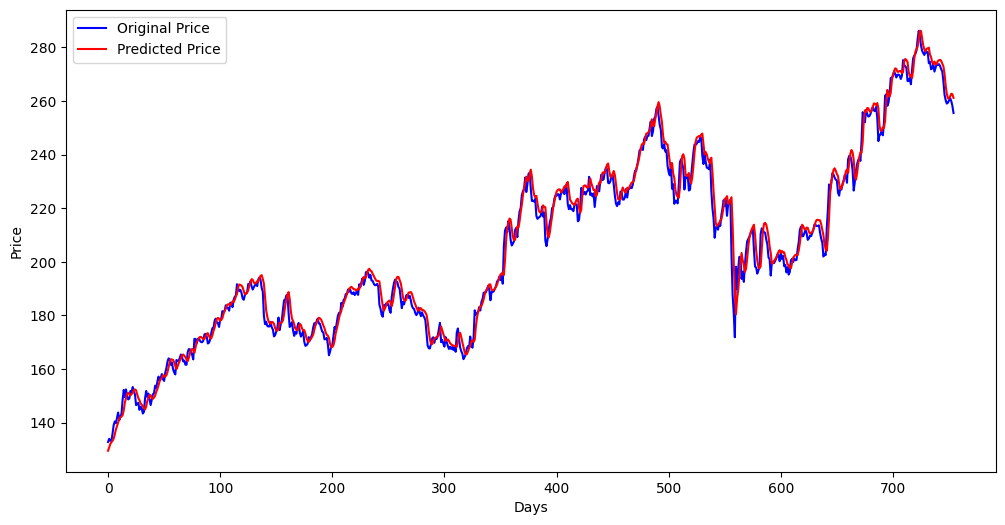

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(160.0, 290.0)

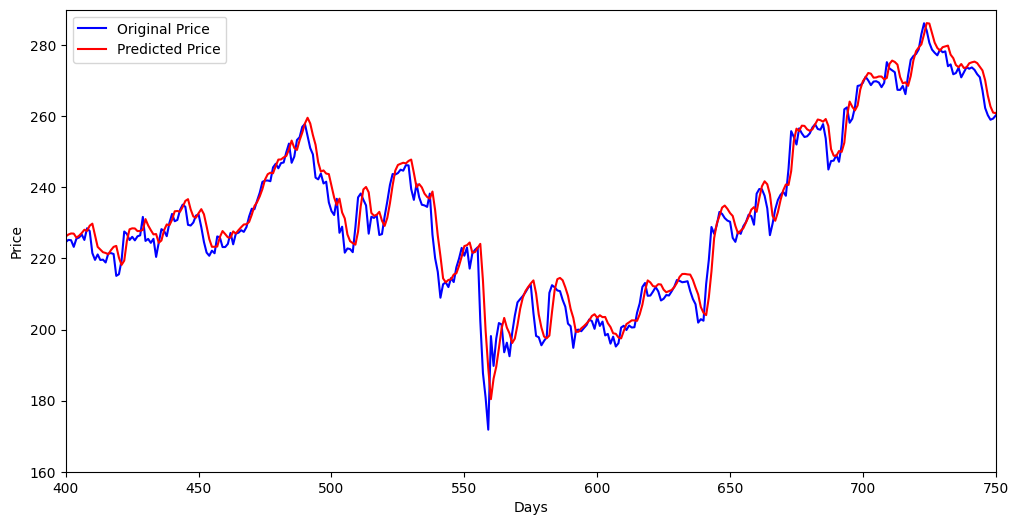

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(400, 750) # zoom in
plt.ylim(160, 290)


# 10. Model Evaluation

In [65]:
# mean squared error (mse)
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
mse = mean_squared_error(y_test, y_predicted) # lower is better
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 16.63645366407308


In [64]:
# root mean squared error (rmse)
rmse = np.sqrt(mse) # lower is better
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 4.078780904151764


In [67]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.985712168036227
